In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
titanic_df = pd.read_csv("train.csv")


In [3]:

print("======Data Headers=======")
print(titanic_df.head())

print("=====Data Decription=====")
titanic_df.info()
titanic_df.describe()

titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

titanic_df.drop(['Parch'], axis=1, inplace=True)

print("=====Check if columns were really dropped=====")
print(titanic_df.head())

titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
print(titanic_df["Embarked"])

titanic_df[["Sex", "Survived"]].groupby(
    ['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(get_person, axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'], axis=1, inplace=True)



======Data Headers=======
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

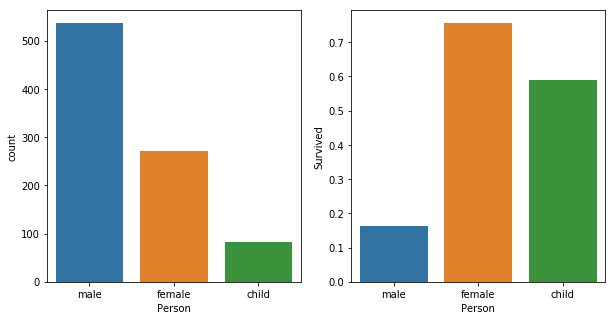

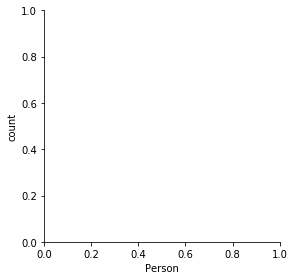

In [4]:

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.factorplot('Person', data=titanic_df, kind='count', ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(
    ['Person'], as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc,
            ax=axis2, order=['male', 'female', 'child'])

plt.show()
titanic_df.drop(['Person'], axis=1, inplace=True)



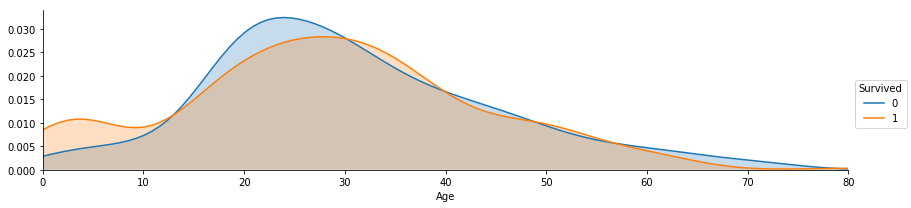

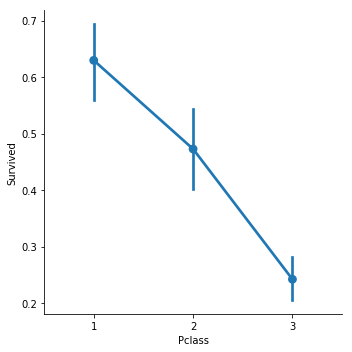

'End of pclass'

In [5]:


'''No of passedngers in each group '''


facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass', 'Survived', order=[1, 2, 3], data=titanic_df, size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'], axis=1, inplace=True)
titanic_df = titanic_df.join(pclass_dummies_titanic)

plt.show()

'''End of pclass'''